In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot ACF and PACF, calculate Dickey–Fuller test
        y - timeseries pandas series
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Agumented Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [4]:
df = pd.read_csv('AirPassengers.csv',parse_dates = ['Month'],infer_datetime_format=True)

In [5]:
df.set_index('Month',inplace = True)

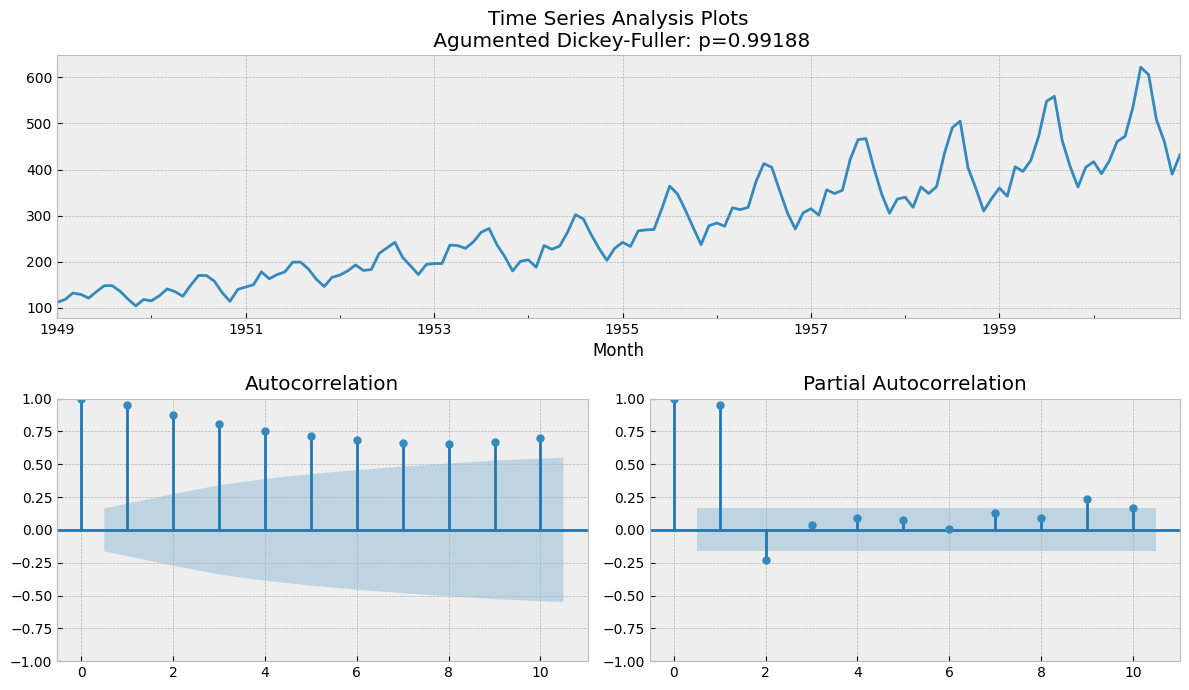

In [6]:
tsplot(df['#Passengers'], lags=10, figsize=(12, 7), style='bmh')

In [7]:
df.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [8]:
# Simple Moving Average (SMA) for smoothing

window_size = 3  # Adjust the window size as needed
df['MA'] = df['#Passengers'].rolling(window=window_size).mean()


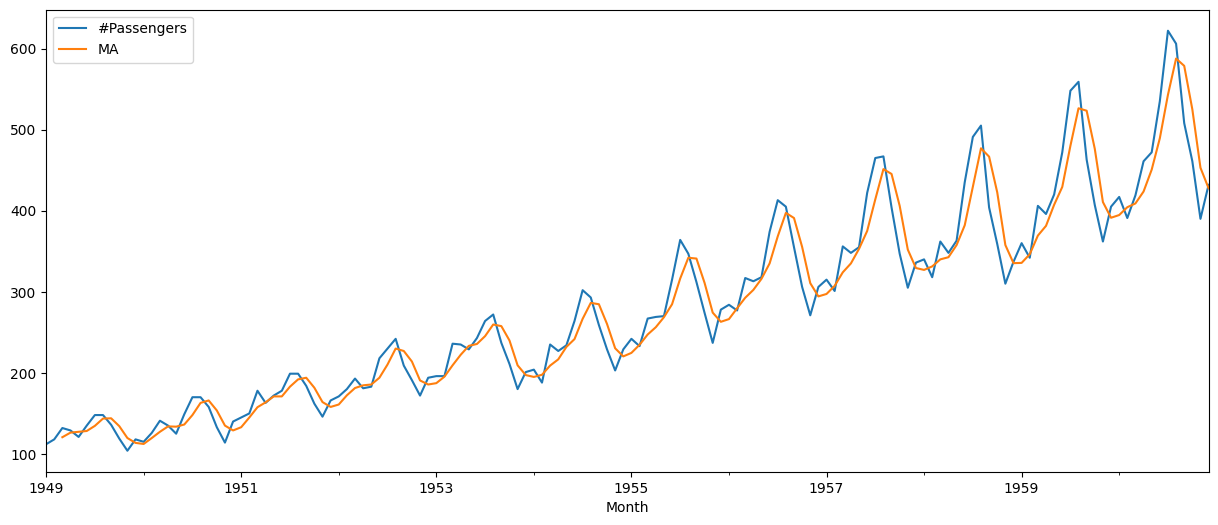

In [9]:

df['#Passengers'].plot(figsize=(15, 6))
df['MA'].plot(figsize=(15, 6))
plt.legend()

In [10]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA for time series forecasting
p = 1  # AR order
d = 1  # Integrated order (for differencing)
q = 0  # MA order

# ARIMA modeling
arima_model = ARIMA(df['#Passengers'], order=(p, d, q))
arima_fit = arima_model.fit()
df['ARIMA'] = arima_fit.fittedvalues

#arima = df['ARIMA'].resample('MS').mean()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


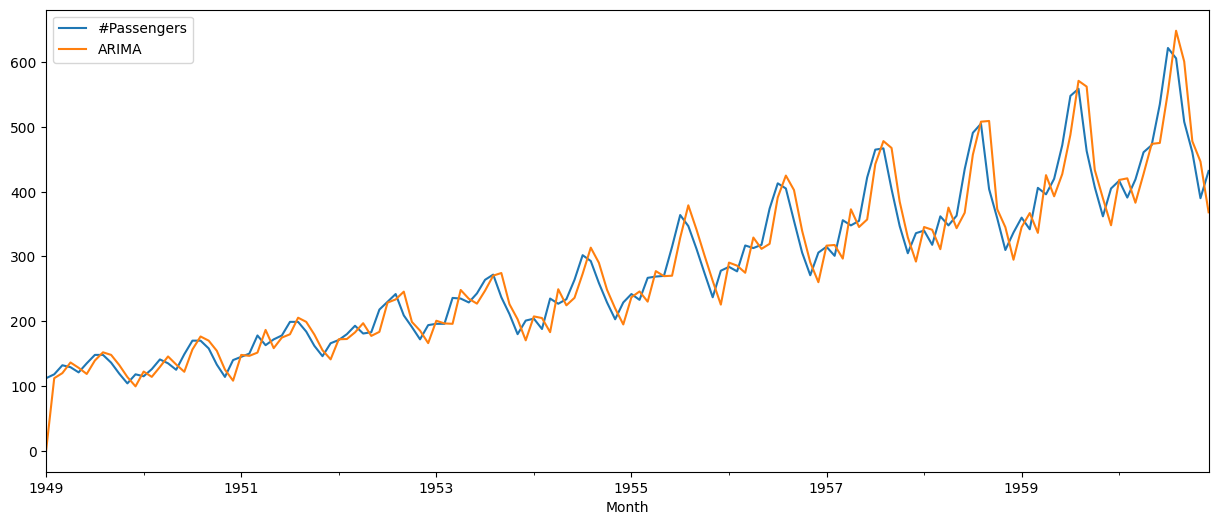

In [11]:
df['#Passengers'].plot(figsize=(15, 6))
df['ARIMA'].plot(figsize=(15, 6))
plt.legend()